# Day : 01  Simple Linear Regression

In the simple linear Regression we are given Linear or Sort of Linear Datasets. Then we try to find the best fit line
from the dataset. Best fit line Refers to the line which makes minimum errors. 
For finding the best fit line internally the algorithm must know the value of m and b in the equation 
                        y = mx + b
    
    Where we can find the m by the formula m = summation of i =1 to n [(Xi - Xmean) * (Yi - Ymean)/ (Xi - Xmean)**2]
    
    and b can be found by the formula b = Y.mean - m*X.mean  
    
    Let's create a python class and implement the above logic.


In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt


In [4]:
ds = pd.read_csv('datasets/placement.csv')
ds

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25
3,7.42,3.67
4,6.94,3.57
...,...,...
195,6.93,2.46
196,5.89,2.57
197,7.21,3.24
198,7.63,3.96


<b> The first thing after we receive the dataset is to plot the given datasets</b>

Text(0, 0.5, 'PACKAGE ')

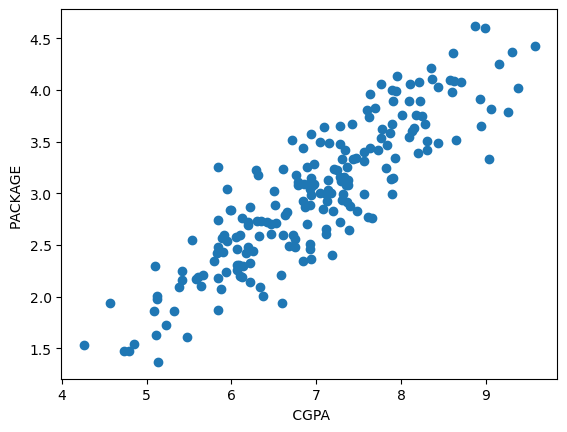

In [5]:
plt.scatter(ds['cgpa'], ds['package'])
plt.xlabel (' CGPA')
plt.ylabel('PACKAGE ')

In [6]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(ds.iloc[:,0:1], ds.iloc[:,-1])

<b> Here above we have imported the sklearn library and then spilt the data into two sets train set and test set  </b>

In [5]:
X_train

,cgpa
161,7.30
135,6.10
179,7.14
140,7.91
163,8.93
...,...
182,5.88
113,6.94
138,7.91
127,6.78


In [8]:
X_test.head()

,cgpa
18,6.94
79,7.18
166,8.60
122,5.12
28,5.94


In [7]:
X_train.shape

(150, 1)

<b> Now let's create a class to actually implement the above simple linear regression logic </b>

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)


LinearRegression()

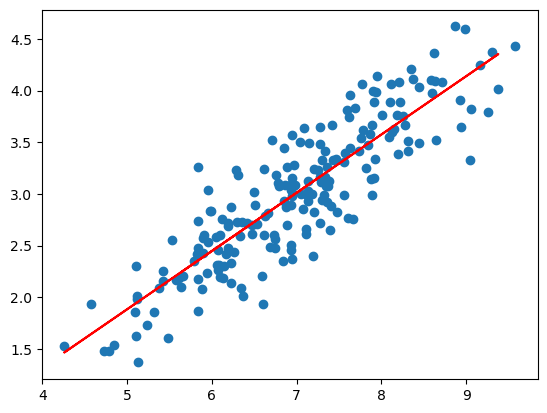

In [9]:
plt.scatter(ds['cgpa'], ds['package'])
plt.plot(X_train, lr.predict(X_train), color = 'red')

# Day 2 :  Regression Efficiency

There are various ways of calculating the efficieny of the Regression models
1. <b>MAE (Mean Absolute Error) </b>
Here this method is suitable if there presents the outliers and the unit of the MAE is same as the unit of the data so it is 
easy to interpret . The drawback of this method is as we take mode in formula this not differentiable at 0.

2.<b> MSE(Mean Square Error) </b> 
Here this method solves the problem of MAE we take the square rather than the modulus so it is differentiable. So it
can be used loss function. The drawback for this is as we take the square in the formula the unit is not
same and affected by the outliers.

3. <b>RMSE(Root Mean Square Error)</b>
this method is the square root of the MSE. As we square root this one the unit is same so it is easy to interpret. Same as MSE it \
is affected by outliers.

4. <b> R-2 Score </b>
this method tell how good the algorithm is performing. In fact this compares how better the best fit line is than Mean line
R-2 score = i-(SSR/SSM)
R=0 Means the Mean line is equals to regression Line and it indicates our result is independent of the variable rather it is 
giving the output mean
R = 1 is if the best fit line touches every point which is quite impossible.
Basically if our R2 score is 0.70 it means that  input column is able to explain the 70 % of variance of output columns

4. <b>Adjusted R3 score </b>
In R2 score if we add the Irrevalent features the R2 score will also increase. so to overcome this one 
Adjusted R2 score was introduced 
Adjusted R2 score = (1-R2)(n-1)/(n-1-k)

In [10]:
 from sklearn.metrics import mean_absolute_error, mean_squared_error , r2_score

In [11]:
y_pred = lr.predict(X_test)


In [12]:
y_test.values

array([3.09, 2.93, 3.13, 2.94, 2.09, 3.89, 2.93, 2.82, 4.43, 3.12, 3.98,
       4.21, 2.99, 3.25, 2.99, 2.84, 2.72, 2.66, 2.31, 2.3 , 2.89, 2.17,
       2.61, 4.62, 2.26, 3.67, 2.6 , 3.62, 2.48, 2.31, 2.48, 3.57, 3.96,
       2.98, 3.48, 1.98, 2.83, 3.08, 3.76, 2.61, 2.4 , 3.44, 2.83, 2.35,
       3.74, 2.73, 2.21, 2.49, 3.18, 2.87])

In [13]:
print(f' MAE  {mean_absolute_error(y_test, y_pred)} ')

 MAE  0.25922325692732767 


In [14]:
print(f' MSE  {mean_squared_error(y_test, y_pred)} ')

 MSE  0.10439924743911827 


In [15]:
print(f' RMSE  {np.sqrt(mean_absolute_error(y_test, y_pred))} ')

 RMSE  0.5091397224017467 


In [16]:
r2 =   r2_score(y_test, y_pred)
print(f' R Score {r2} ' )

 R Score 0.7295293501136237 


In [17]:
X_test.shape

(50, 1)

In [18]:
adjusted_r2 =(1- (1-r2)*(50-1)/(50-1-1)) 
print(f' Adjusted R2 score {adjusted_r2}')

 Adjusted R2 score 0.7238945449076575


<b>Multiple Regression </b>

In simple Linear Regression we only have one input column which will affect the output columns but talking about the real 
life most of the time we will be having more than one input columns. for example if we are predicting the price of house we 
will will be considering many thing where it is located how old the house is what is the size of the house rather than only 
looking after the size of the house and the Multiple linear Regression comes into picture here. 

In simple Linear Regression the algorithm draws the Best fit line which tries to minimize the error same the way in Multiple 
Linear Regression we tries to draw the plane with the equation y = β0 + β1X1 + β2X2 + β3X3 + _ _ _ _ + βnXn. And the aim of the
Algorithm is to find the value of β0, β1 , β3.

The value of the β0, β1, β2 represents how much the output columns is dependent of over the variable. for example if the value 
of the β1 is high, it means the output column is highly dependent of the first variable and if the β3 is low it means that 
the output columns is not too much dependent of the third variable.
 The value of the β  can be calculated by 
                         β = (X^T X)**-1 (X^Ty)

# Day 3 : Multiple Regression Continued : 

In [19]:
# Coding of the Multiple Linear Regressions 
# Using Sklearn Linear Regression
from sklearn.datasets import load_diabetes
X,y = load_diabetes(return_X_y = True)
print(X.shape)
print(y.shape)


(442, 10)
(442,)


In [20]:
X


array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [21]:
y

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [22]:

from sklearn.model_selection import train_test_split
X_train, X_test, y_train , y_test = train_test_split(X,y, test_size = 0.2, random_state = 2)
print(X_train.shape)
print(X_test.shape)

(353, 10)
(89, 10)


In [23]:

reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression()

In [24]:
y_pred = reg.predict(X_test)

In [25]:


r2 = r2_score(y_test, y_pred)
r2

0.4399338661568968

In [26]:
reg.coef_

array([  -9.15865318, -205.45432163,  516.69374454,  340.61999905,
       -895.5520019 ,  561.22067904,  153.89310954,  126.73139688,
        861.12700152,   52.42112238])

In [27]:
reg.intercept_

151.88331005254167

Now making our own Multiple Linear Regresssion Class using python

In [28]:
class MyOwnLR():
    
    def __init__(self):
        self.coef_ =None 
        self.intercept_ = None
    
    def fit(self, X_train, y_train):
        X_train = np.insert(X_train, 0, 1, axis = 1)
        
        betas = np.linalg.inv(np.dot(X_train.T, X_train)).dot(X_train.T).dot(y_train)
        self.intercept_= betas[0]
        self.coef_ = betas[1:]
        
    def predict(self, X_test):
        
        y_pred = np.dot(X_test, self.coef_) + self.intercept_
        return y_pred
    
    
reg1 = MyOwnLR()

reg1.fit(X_train, y_train)
y_pred1 = reg1.predict(X_test)
y_pred1

array([154.1213881 , 204.81835118, 124.93755353, 106.08950893,
       258.5348576 , 256.3310074 , 118.75087616, 119.52440696,
       101.50816735, 190.54048661, 141.70656811, 172.51883961,
       174.33861649, 134.80942706, 294.13994537,  94.11798038,
       211.97059795, 156.49579378, 134.21000428, 119.62664644,
       148.87842251, 165.00873409, 151.10021038, 176.04063756,
       133.27769647, 221.29555392, 197.17324941,  96.1577688 ,
        50.26012711, 230.48580317, 242.06073866, 114.11129218,
        67.07532417,  94.52943825, 201.21415375, 167.05136201,
       159.881268  , 192.78746659, 114.49551325, 233.48234551,
       140.82563045, 121.0680409 , 192.27480772, 191.12738845,
       179.16865788, 148.34935601, 163.47414622, 276.81647884,
       100.17926432, 164.10555298, 255.80762189, 136.9466204 ,
       152.37503699, 107.92237882, 194.21924678,  77.34670792,
       118.50482479,  68.38335763, 154.29258529, 162.48840259,
       168.36788326, 156.87790322,  97.14191797, 238.16

In [29]:
X_train

array([[-0.00188202, -0.04464164, -0.06979687, ..., -0.03949338,
        -0.06291688,  0.04034337],
       [-0.00914709, -0.04464164,  0.01103904, ..., -0.03949338,
         0.01703607, -0.0052198 ],
       [ 0.02354575,  0.05068012, -0.02021751, ..., -0.03949338,
        -0.09643495, -0.01764613],
       ...,
       [ 0.06350368,  0.05068012, -0.00405033, ..., -0.00259226,
         0.08449153, -0.01764613],
       [-0.05273755,  0.05068012, -0.01806189, ...,  0.1081111 ,
         0.03606033, -0.04249877],
       [ 0.00175052,  0.05068012,  0.05954058, ...,  0.1081111 ,
         0.06898589,  0.12732762]])

In [30]:
print(X_train.shape)
print(X_test.shape)
print(y_test.shape)
print(y_pred1.shape)

(353, 10)
(89, 10)
(89,)
(89,)


In [31]:
print(r2_score(y_test, y_pred1))

0.43993386615689656


Here we calculate the r2 score which is similar to the above one which we did using the sklearn algorithm. Hence we can clearly 
say that above formula is being implemented by the sklearn internally

<b> Problem with  Ols Solution  </b>

the above solution is OlS solution.But we carry lot's of problem with this one the main problem is 
Every point of the solution we have to calculate the inverse of the matrix and hence the task of calculating the inverse is 
Computational Expensive i.e. the time complexicity is so high which is equals to the O(n^3). The optimized algorithm can also 
go upto (n^2.7). Hence if there are more dimension the algorithm will take more time. so the concept of Gradient Descent comes 
into the picture.

# Loss Function 

<b> Introduction </b> 

A loss function is also known as a cost function or objective function is a mathematical function that measures the difference
between the predicted output and the actual targeted values in Machine learning model. The primary goal of training the machine
learning model is to minimize the value of loss function which corresponds to improving the model's performance.

Selecting the loss function :

    1. Problem type : The choice of the loss function depends upon the type of problem we are solving. For Example in regression
        tasks, mean squared Error (MSE) or Mean abousulte Error (MAE) are usually used.
    
    
    2. robust to outliers : Mean Squared error are more sensitve to outliers which can lead to model that is overly influenced 
        by the values.  If the outliers are  present using loss function such as Mean Absolute Error or Huber loss can be a good 
        solution
    
    3. Interpreability and ease of use : A good loss function is intepreable and easy to use.0. Simple loss function such as 
        mean squared error or cross entropy are widely used because they are eay to understand, compute and interpret..
        
    
    4. Differentiability : Most of the optimitization algo lilke gradient descent, require  the loss function to be differentiable
        chose a loss function that has first order derivates which makes it easier to compute the gradient needed for optimization.
        
        
    5. Compatibility with model : Ensure that the choosen loss function is comptiable with the model architecture you are using. 
           Some models have the specific requirements or assumptions about the loss function. for Example : Linear REgression      assumes 
        a Gaussian noise distrubution which is why squared error is sutiatble
            
        
  <b> No matter which Loss Function. The main Aim is Guide to the right value or right parameters. </b>
  
    

Convex function and non convex function


For the convex function we can go for the gradient descent  but for the non convex function we have other optimization techniques

# Day 4 : Gradient Descent 

<b> Gradient Descent is the technique of optimising  the algorithm </b>

Steps for finding the b if M is known:
    
    
    Step 1 : Selecting the random value.
    
    Step 2 : Calculating the slope from the function and the slope direction will guide wheather to go.
        if the slope is Negative, then we have to go front or simply increase the value of b.
        if the slope is Positive, then we have to go back or simply decrease the value of b.
        
        Simply the formula will be 
                 
                            B = b(old) - Slope
                But to prevent the rapid change of the we introduce somthing called learning rate which  termed as how long 
                the algorithm take to learn from the data. and the simplified formula becomes
                
                    B(new) = b(old) - Learning Rate(L.R) * Slope
                    
                    
                Generally the value of Learning rate  is very less close to 0.01 but it depends upon the algorithm how fast 
                you want to train your model.
                
    How to know when we get the exact value of b ? 
    
    If B(new)- b(old) is equals to very very small close to 0.00001 then we can termed as our algo is not learning more 
    and conclude the value of the B.
    
    Second Method is defining the iteration in how many iteration we are excepted to get the value of B for example 100, 1000
    .These number of iteration are known as Epochs.


In [32]:
from sklearn.datasets import make_regression
import numpy as np

In [33]:
X,y = make_regression(n_samples = 4, n_features =1, n_informative =1, n_targets =1 , noise = 80, random_state =13)

In [34]:
X

array([[-0.71239066],
       [ 0.45181234],
       [-0.04450308],
       [ 0.75376638]])

In [35]:
y

array([  7.21786552,  16.04609925, -27.83756166, 144.36688189])

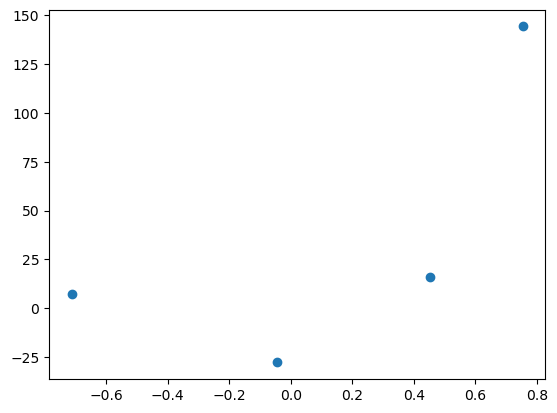

In [36]:
plt.scatter(X,y)

In [37]:
#Applying the OlS Method

In [38]:
reg2 = LinearRegression()
reg2.fit(X,y)

LinearRegression()

In [39]:
reg2.coef_

array([78.35063668])

In [40]:
reg2.intercept_

26.15963284313262

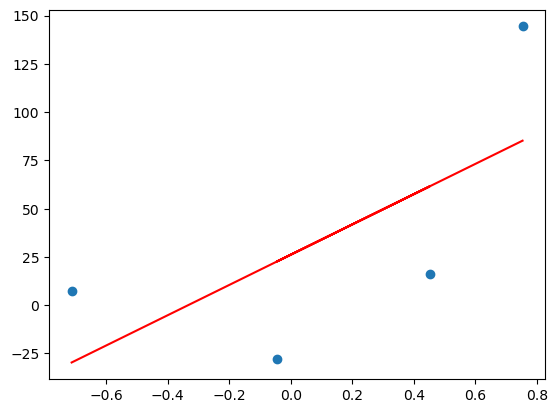

In [41]:
plt.scatter(X,y)
plt.plot(X,reg2.predict(X), color= "red")

this is the best fit line for the above problem and now let's asssume the value of the b = -100 and get to this line

From above Solution we can see that the value of the reg2 intercept or simply b is 26.15. Let's get through gradient descent
Given the value of m = 78.35

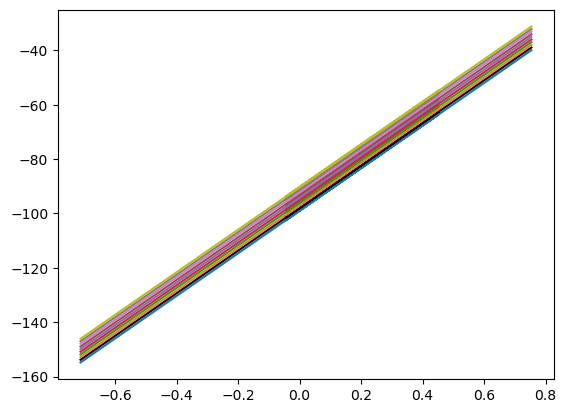

In [42]:
b= -100
m = 78.35
LR = 0.001

epochs = 10
plt.plot

for i in range(epochs):
    loss_slope = -2*np.sum(y-m*X.ravel()-b)
    b = b-LR*loss_slope
    y_pred = m*X +b
    if i == 1:
        plt.plot(X,y_pred, color = "black")
    elif i == 10:
        plt.plot(X,y_pred, color = "yellow")
    else:
        plt.plot(X,y_pred)
   

Now assuming that we have the unknown value of M and the unknown value of b.
In 3-D plane the slope will have two components one will be in the direction of b 
and other one will be in the direction of m.


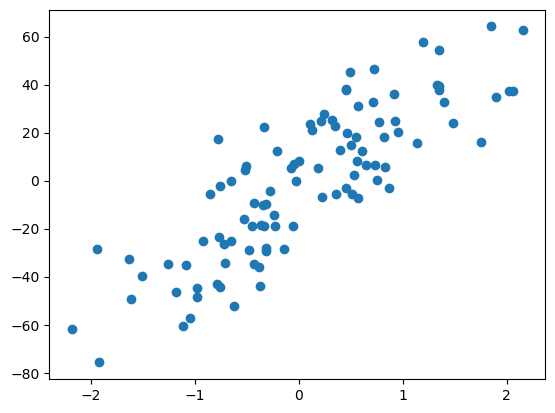

In [43]:
X,y = make_regression(n_samples = 100, n_features =1, n_informative =1, n_targets =1 , noise = 20, random_state =13)
plt.scatter(X,y)


# coding without the known value of m and b

class GDregressor():
    def __init__(self, learning_rate, epochs):
        self.m = 100
        self.b = -120 
        self.lr = learning_rate 
        self.epochs = epochs
    
    def fit(self, X, y):
        for i in range(self.epochs):
            loss_slope_b = -2*np.sum(y- self.m * X.ravel()- self.b)
            loss_slope_m = -2*np.sum ((y- self.m * X.ravel()- self.b)*X.ravel())

        self.b = self.b - (self.lr * loss_slope_b)
        self.m = self.m - (self.lr * loss_slope_m)

        print(self.b, self.m )



    def predict(self, X):
        return m*X + self.b



Types of Gradient Descent :
    1. Batch Gradient Descent
    2.Schotastic Gradient Descent
    3. Mini batch Gradient Descent
   
   
  Most used Gradient Descent is Schotastic Gradient Descent. Batch Gradient desecent is not suitable with big data.

In [46]:
from sklearn.linear_model import SGDRegressor

In [48]:
reg = SGDRegressor(max_iter = 100, learning_rate = 'constant', eta0 = 0.01)
reg.fit(X_train, y_train)

D:\Annoconda\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1575: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDRegressor(learning_rate='constant', max_iter=100)

In [49]:
reg.predict(X_test)

array([159.42446407, 196.46845605, 145.82435466, 115.04648768,
       249.29057806, 241.60702841, 113.53495587, 120.86555918,
        99.24123509, 190.55086395, 166.03817205, 178.31234155,
       189.85228847, 156.6501384 , 258.42304232,  98.61020794,
       191.03959667, 145.16225664, 145.92895584, 145.19941344,
       138.55170796, 195.3761844 , 172.31150543, 183.48217215,
       132.55388245, 224.97845471, 200.25443284, 126.9410571 ,
        70.05886718, 245.800768  , 241.16060711, 125.4774888 ,
        81.54870114, 116.66293345, 204.98107157, 171.98263744,
       172.74570854, 201.48417713, 121.48233659, 237.73664256,
       141.94951387, 133.24829827, 190.74992661, 191.67877848,
       176.18229349, 152.14939668, 179.14144555, 282.34971624,
       124.04958928, 194.56385589, 240.96503527, 136.34516265,
       149.53806116, 156.36165476, 194.9101348 , 120.16991689,
       161.63800141,  92.73490114, 164.16417839, 149.49528209,
       169.54217697, 177.01051876, 117.14879124, 210.15

In [50]:
r2_score(y_test, reg.predict(X_test))

0.4277180634221561

# Regression Analaysis

Regression analaysis is the stastical method used to examine the realtionship between one dependent variable and one or more 
independent variables. The goal of the Regression analaysis is to understand how the dependent variable are altered and to create
a model that can predict the values of the dependent variable based on the values of independent variables.

# <b> Summary of the 1st Week  </b>

The first week of learning machine learning was quite good and full of knowldege. 
First of all i learnt about what actually machine learning is and it's type in details. Then   I cover one of the most confuse 
topics in the industry which is <b> AL vs ML vs DL </b>. Then i learnt about the Batch Machine learning and Online Machine 
learning. Reading about the growth of reinforcement learning was really interesting. Can't wait to start learning it in detail.
Same the way i went through Machine learning Development life cycle. With it i studied another confusing topics what actually 
machine learning engineer, data analayst, data engineer, data scientist does and the skills needed for each of themm.

After theese prequesites I dive into Supervised Machine learning . Starting with Simple Linear Regression i  got to know how 
the linear regression works and math behind it. Same the way started Multiple Linear Regression and introduced to Units 
calculating Regression Efficiency (MAE, MSE, RMSE, R2_score , adjusted r2_score). Loss function with selecting it. Convex function
and non convex function, gradient descentand Regression analaysis were also studied. The most important thing that i learnt was 
although we can predict using the linear algebra the need of the stats in machine learning. The difference between inference and
perdiction. I got the little concept of the Black box model(only predict but don't tell how). I have the illusion that machine 
learning was only for the prediction, which came to wrong machine learning was for inference actually describe is the variable depending upon on other or not and if yes how is it. 

Not to much coding but the concept gained were equally important which will surely help studying further.